# Part I - Prosper Loan Data Exploration
## by David Abiose

## Introduction
> The prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> According to investopedia - in its simplest meaning, a loan is when money is given to another party in exchage for repayment of the loan principal amount plus interest. [The term 'loan'](https://www.investopedia.com/terms/l/loan.asp).

> There are certain varables (factors) that a `Lender` **(A business/financial institution that extends credits to companies & individuals with the expectation that the full amount of the loan will be repaid)** will consider before deciding to offer a loan to the `borrower`**(An individual/company receiving the money from the lender & have to pay back according to the terms of the loan agreement)**. some of these factors are `credit score`, `borrower's income`, `debt to income ratio` and so on. 

> This data set contains a large number of variables that are significant for loan procedures, and we will be analysing some of the key variables to establish interesting insights, to create plots that are aesthetically appealing and to convey important messages. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the dataset into loan dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Assessing the dataset

In [3]:
#programmatic assessment
print(loan.shape)
print(loan.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [4]:
#Checks for duplicated listing key
loan[loan['ListingKey'].duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,NaN,60,Current,NaN,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


- There are 871 rows with duplicated `ListingKey` values

In [5]:
#Check if there are Rows with DebtToIncomeRatio greater than 10.01
loan.query('DebtToIncomeRatio > 10.01')['DebtToIncomeRatio']

Series([], Name: DebtToIncomeRatio, dtype: float64)

- The `DebtToIncomeRatio` values is capped at 10.01, we check for ratio values that are greater than this but none was found

### Cleaning the Dataset

In [6]:
# Make copies of original pieces of data
loan_clean = loan.copy()

In [7]:
#We drop duplicates
indexes = loan_clean[loan_clean['ListingKey'].duplicated()].index
loan_clean.drop(indexes, inplace=True)

In [8]:
#Test
loan_clean[loan_clean['ListingKey'].duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [9]:
#Test
loan_clean['ListingKey'].duplicated().sum()

0

In [10]:
#Change Datatype
loan_clean['ListingCreationDate'] = pd.to_datetime(loan_clean['ListingCreationDate'])
loan_clean['LoanOriginationDate'] = pd.to_datetime(loan_clean['LoanOriginationDate'])
loan_clean['ClosedDate'] = pd.to_datetime(loan_clean['ClosedDate'])

In [11]:
#Join 'ProsperRating (Alpha)' & 'ProsperRating (numeric)' column together to form a new column
loan_clean['ProsperRating'] =  loan_clean['ProsperRating (numeric)'].astype(str)+ " - " +loan_clean['ProsperRating (Alpha)']

In [12]:
loan_clean['ProsperRating'].value_counts().index

Index(['4.0 - C', '5.0 - B', '6.0 - A', '3.0 - D', '2.0 - E', '1.0 - HR',
       '7.0 - AA'],
      dtype='object')

In [13]:
#Change the newly formed column to a categorical ordinal variable with each rates level being ranked
rating_list = ['1.0 - HR', '2.0 - E', '3.0 - D', '4.0 - C', '5.0 - B', '6.0 - A', '7.0 - AA']

ratings = pd.api.types.CategoricalDtype(ordered = True, categories = rating_list)

loan_clean['ProsperRating'] = loan_clean['ProsperRating'].astype(ratings)

In [14]:
#Test
loan_clean['ProsperRating'].unique

<bound method Series.unique of 0             NaN
1         6.0 - A
2             NaN
3         6.0 - A
4         3.0 - D
           ...   
113932    4.0 - C
113933    6.0 - A
113934    3.0 - D
113935    4.0 - C
113936    6.0 - A
Name: ProsperRating, Length: 113066, dtype: category
Categories (7, object): ['1.0 - HR' < '2.0 - E' < '3.0 - D' < '4.0 - C' < '5.0 - B' < '6.0 - A' < '7.0 - AA']>

In [15]:
#We check if there are ProsperScore greater than 10
print(loan_clean['ProsperScore'].value_counts())

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64


`ProsperScore` - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. 
> From the above value counts, there is a score value of 11. We need to replace this value as it is inacurrate with the Prospser requirement.

In [16]:
#Replace the 11 values with NaN
loan_clean['ProsperScore'] = loan_clean['ProsperScore'].replace(11, np.nan)
loan_clean['ProsperScore'].value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
1.0       946
Name: ProsperScore, dtype: int64

In [17]:
#We cut the Risk scores into levels with 10-Lowest risk level and 1-Highest risk level
risk_edges = [1, 2.5, 5.0, 7.5, 10]
risk_labels = ['High', 'Medium high', 'Medium', 'Low']

loan_clean['ProsperRiskLevel'] = pd.cut(loan_clean['ProsperScore'], risk_edges, labels = risk_labels)

In [18]:
loan_clean[['ProsperScore', 'ProsperRiskLevel']].sample(5)

,ProsperScore,ProsperRiskLevel
33806,7.0,Medium
63871,4.0,Medium high
113554,NaN,NaN
38736,NaN,NaN
96005,9.0,Low


In [19]:
#Replace the numerical values in the ListingCategory column
loan_clean['ListingCategory (numeric)'].replace(0, 'Not Available', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(1, 'Debt Consolidation', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(2, 'Home Improvement', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(3, 'Business', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(4, 'Personal Loan', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(5, 'Student Use', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(6, 'Auto', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(7, 'Other', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(8, 'Baby&Adoption', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(9, 'Boat', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(10, 'Cosmetic Procedure', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(11, 'Engagement Ring', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(12, 'Green Loans', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(13, 'Household Expenses', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(14, 'Large Purchases', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(15, 'Medical/Dental', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(16, 'Motorcycle', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(17, 'RV', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(18, 'Taxes', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(19, 'Vacation', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(20, 'Wedding Loans', inplace=True)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [20]:
loan_clean['ListingCategory (numeric)'].value_counts()

Debt Consolidation    57624
Not Available         16965
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [21]:
loan_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [22]:
loan_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcar

In [23]:
#select columns from the dataframe that are useful for analysis
loan_clean = loan_clean[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
                        'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
                        'EstimatedReturn', 'ProsperScore', 'ProsperRiskLevel', 'ProsperRating', 'ListingCategory',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                        'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit', 'IncomeRange',
                         'StatedMonthlyIncome','DebtToIncomeRatio', 'LoanOriginalAmount', 'LoanOriginationDate',
                         'MonthlyLoanPayment']]

In [24]:
loan_clean

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,...,True,640.0,659.0,1500.0,"$25,000-49,999",3083.333333,0.17,9425,2007-09-12,330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,...,False,680.0,699.0,10266.0,"$50,000-74,999",6125.000000,0.18,10000,2014-03-03,318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,...,False,480.0,499.0,NaN,Not displayed,2083.333333,0.06,3001,2007-01-17,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,...,True,800.0,819.0,30754.0,"$25,000-49,999",2875.000000,0.15,10000,2012-11-01,321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,...,True,680.0,699.0,695.0,"$100,000+",9583.333333,0.26,15000,2013-09-20,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663,NaN,36,Current,NaT,0.22354,0.1864,0.1764,0.16490,...,True,700.0,719.0,1886.0,"$50,000-74,999",4333.333333,0.13,10000,2013-04-22,364.74
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,0.10070,...,True,700.0,719.0,6658.0,"$75,000-99,999",8041.666667,0.11,2000,2011-11-07,65.57
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703,NaN,60,Current,NaT,0.23984,0.2150,0.2050,0.18828,...,True,700.0,719.0,7853.0,"$25,000-49,999",2875.000000,0.51,10000,2013-12-23,273.35
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,0.24450,...,True,680.0,699.0,4137.0,"$25,000-49,999",3875.000000,0.48,15000,2011-11-21,449.55


#### Final columns (variables) Description
1. ListingKey - Unique key for each listing, same value as the 'key' used in the listing object in the API.
2. ListingCreationDate - The date the listing was created.
3. CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4. Term - The length of the loan expressed in months.
5. LoanStatus - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
6. ClosedDate - Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
7. BorrowerAPR - The Borrower's Annual Percentage Rate (APR) for the loan.
8. BorrowerRate - The Borrower's interest rate for this loan. 
9. LenderYield - The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
10. EstimatedEffectiveYield - Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
11. EstimatedLoss - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
12. EstimatedReturn - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
13. ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
14. ProsperRiskLevel - The prosper risk scores categorized into levels
15. ProsperRating - The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
16. ListingCategory - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
17. BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
18. Occupation - The Occupation selected by the Borrower at the time they created the listing.
19. EmploymentStatus - The employment status of the borrower at the time they posted the listing.
20. EmploymentStatusDuration - The length in months of the employment status at the time the listing was created.
21. IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
22. CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
23. CreditScoreRangeUpper - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
24. AvailableBankcardCredit - The total available credit via bank card at the time the credit profile was pulled.
25. IncomeRange - The income range of the borrower at the time the listing was created.
26. StatedMonthlyIncome - The monthly income the borrower stated at the time the listing was created.
27. DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
28. LoanOriginalAmount - The origination amount of the loan.
29. LoanOriginationDate - The date the loan was originated.
30. MonthlyLoanPayment - The scheduled monthly loan payment.



In [25]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113066 non-null  object        
 1   ListingCreationDate       113066 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   object        
 3   Term                      113066 non-null  int64         
 4   LoanStatus                113066 non-null  object        
 5   ClosedDate                55076 non-null   datetime64[ns]
 6   BorrowerAPR               113041 non-null  float64       
 7   BorrowerRate              113066 non-null  float64       
 8   LenderYield               113066 non-null  float64       
 9   EstimatedEffectiveYield   83982 non-null   float64       
 10  EstimatedLoss             83982 non-null   float64       
 11  EstimatedReturn           83982 non-null   float64       
 12  Pr

### What is the structure of your dataset?

> In the final dataset that will be used for the Exploratory Data Analysis, there are 113066 loans in the dataset with 30 features.
Most of the variables are Numeric in nature, with 3 DataTime variables and 9 Nominal variables. The dataset also includes 2 ordinal variables that has an instrisic order such as;
(worst) ——> (best) <br>
ProsperRiskLevel: High, Medium high, Medium, Low <br>
ProsperRating: 1.0 - HR, 2.0 - E, 3.0 - D, 4.0 - C, 5.0 - B, 6.0 - A, 7.0 - AA             


### What is/are the main feature(s) of interest in your dataset?

> One of the main feature of interest in the dataset is investigating the key factors that influence the BorrowerAPR. The amount that borrowers will pay annually on a loan, presented as a percentage, is called the annual percentage rate (APR). It is different from interest rates in that it takes into account additional fees and charges (aside from compounding), so it is typically greater than your typical interest rate. APRs are especially useful when contrasting loans. Even if a variety of criteria decide whether a loan will meet your needs, in general you want to search for a lower APR.
>> The APR of a loan is impacted by numerous variables. among the most important ones are the following: (a) Debt-to-income ratio (b) Annual income (c) Credit score (d) Loan term 

> From our dataset, we will also investigate the following features: <br>
    1. the majority of loan borrowers' employment status. <br>
    2. what percentage of all loans issued are closed? <br>
    3. the listing's category that received the most selections. <br>
    4. the most common loan term offered to borrowers.<br>
    5. The typical loan amount provided for loans with greater risks. <br>
    6. what is the distribution of APR for various yearly income ranges? <br>
    7. How has the average loan amount changed over time? (2007 - 2014) <br>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate that the debt-to-income ratio will have a significant impact on whether or not the borrower is granted a loan. Lenders prefer to see a smaller DTI ratio; thus, it must be low to make the borrower more desirable. Also playing a crucial role in establishing the APR will be the yearly income, generally speaking, lower rates result with higher income.

### Univariate Exploration

#### Exploration 1

- I'll start by examining how the key variable is distributed: Income of the borrowers (StatedMonthlyIncome) and the debt-to-income ratio (DebtToIncomeRatio).

In [26]:
monthly_income = loan_clean['StatedMonthlyIncome'].describe().astype(int)

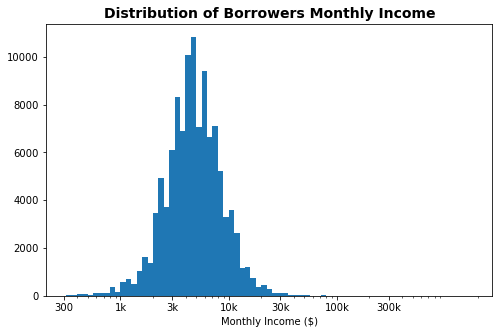

In [27]:
bins = 10**np.arange(2.5,np.log10(monthly_income.max())+0.05 , 0.05)

plt.figure(figsize = [8, 5])
plt.hist(data = loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income ($)')
plt.xscale('log')
plt.xticks([300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5 ], [300, '1k', '3k', '10k', '30k', '100k', '300k'])
plt.title('Distribution of Interest Rate', fontsize = 16, fontweight = 'bold')
plt.title('Distribution of Borrowers Monthly Income', fontsize = 14, fontweight = 'bold')

plt.show()

The StatedMonthlyIncome exhibits a normal distribution when plotted on a log-scale, with the numbers forming a symmetrical shape. With the peak lying between $3,000 and $5,000 per month, StatedMonthlyIncome appears to be unimodal. 

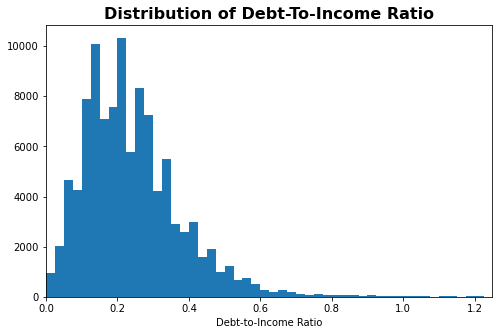

In [28]:
binsize = 0.025

plt.figure(figsize = [8, 5])
bins = np.arange(0, loan_clean['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_clean, x = 'DebtToIncomeRatio', bins=bins)
plt.xlim([0, 1.25])
plt.xlabel('Debt-to-Income Ratio')
plt.title('Distribution of Debt-To-Income Ratio', fontsize = 16, fontweight = 'bold')

plt.show()

The modest bin size for DebtToIncomeRatio proves to be extremely instructive. Its distribution is right-skewed, with most of the loans falling into the low debt-to-income ratio range and few falling into the high debt-to-income range.

#### Exploration 2

- Next, we look at the distribution of the BorrowerApr and The Borrower interest rate.

0    0.35797
Name: BorrowerAPR, dtype: float64
0    0.3177
Name: BorrowerRate, dtype: float64


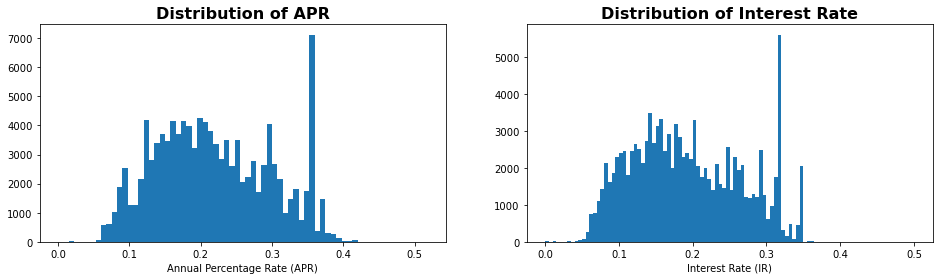

In [29]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 2, 1)
bins = np.arange(0, loan_clean['BorrowerAPR'].max()+0.0075, 0.0075)
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Annual Percentage Rate (APR)')
plt.title('Distribution of APR', fontsize = 16, fontweight = 'bold')
print(loan_clean['BorrowerAPR'].mode())


plt.subplot(1, 2, 2)
bins_IR = np.arange(0, loan_clean['BorrowerRate'].max()+0.0050, 0.0050)
plt.hist(data = loan_clean, x = 'BorrowerRate', bins = bins_IR);
plt.xlabel('Interest Rate (IR)')
plt.title('Distribution of Interest Rate', fontsize = 16, fontweight = 'bold')
print(loan_clean['BorrowerRate'].mode())

Both variables appear to have a distribution shape that is almost symmetical in character, with a spike between the range of 0.3 and 0.4 of the rates appearing to indicate the modal value of both variables. In comparison to BorrowerIR, BorrowerAPR typically has a greater modal value.

#### Exploration 3

- Here, we want to investigate what percentage of all loans issued are closed. <br>
In this context, closed loans are those that have been cancelled, completed, charged_off and/or defaulted. We'll consider grouping these loan statuses into the others category

In [30]:
status = loan_clean['LoanStatus'].value_counts()

loan_status = status.reset_index(name = 'counts')
loan_status.rename(columns = {'index': 'status'},  inplace=True)

loan_status

,status,counts
0,Current,55730
1,Completed,38061
2,Chargedoff,11992
3,Defaulted,5018
4,Past Due (1-15 days),800
5,Past Due (31-60 days),361
6,Past Due (61-90 days),311
7,Past Due (91-120 days),304
8,Past Due (16-30 days),265
9,FinalPaymentInProgress,203


In [31]:
loan_active = loan_status.loc[np.r_[0:1, 4:11], :] #active loans are loans that are not closed

loan_active.reset_index(inplace=True)
loan_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   8 non-null      int64 
 1   status  8 non-null      object
 2   counts  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [32]:
loan_active = loan_active[['status', 'counts']]
loan_active['counts'].sum()

57990

In [33]:
loan_inactive = pd.DataFrame(data = {
    'status': ['others'], 
    'counts': [loan_status['counts'].loc[np.r_[1:4, 11:12]].sum()]
})

loan_inactive #inactive loans are the closed loans

,status,counts
0,others,55076


In [34]:
#combining the loan_active and loan_inactive tables together
loan_status = pd.concat([loan_active, loan_inactive])
loan_status.reset_index(inplace=True)

loan_status = loan_status[['status', 'counts']]
loan_status

,status,counts
0,Current,55730
1,Past Due (1-15 days),800
2,Past Due (31-60 days),361
3,Past Due (61-90 days),311
4,Past Due (91-120 days),304
5,Past Due (16-30 days),265
6,FinalPaymentInProgress,203
7,Past Due (>120 days),16
8,others,55076


> others in this table represent loans that are inactive i.e (Completed, Chargedoff, Defaulted, Cancelled)

In [35]:
loan_status_new = loan_status.loc[np.r_[0:1, 6:7, 8:9], :]

loan_status_new.reset_index(inplace=True)
loan_status_new

loan_status_new = loan_status_new[['status', 'counts']]
loan_status_new

,status,counts
0,Current,55730
1,FinalPaymentInProgress,203
2,others,55076


In [36]:
past_dues = pd.DataFrame(data = {
    'status': ['Past Dues'], 
    'counts': [loan_status['counts'].loc[np.r_[1:6, 7:8]].sum()]
})
past_dues #we combine all the past due loans together

,status,counts
0,Past Dues,2057


In [37]:
loan_status = pd.concat([loan_status_new, past_dues])
loan_status.reset_index(inplace=True)

loan_status = loan_status[['status', 'counts']]
loan_status

,status,counts
0,Current,55730
1,FinalPaymentInProgress,203
2,others,55076
3,Past Dues,2057


Our final loan status table.

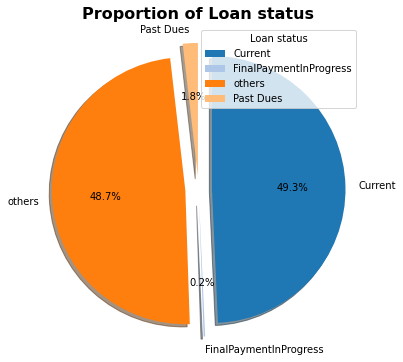

In [38]:
plt.figure(figsize = [8, 6])
colors = sns.color_palette('tab20')
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(loan_status['counts'], labels = loan_status['status'], explode =explode, 
        counterclock=False, startangle = 90, shadow=True, colors=colors, autopct='%1.1f%%')

plt.title('Proportion of Loan status', fontsize = 16, fontweight = 'bold')
plt.legend(title='Loan status', loc = 1)
plt.axis('square');

The majority of loans granted, or 49.3%, are in the "current loan-status," with "others," which represents closed loans, coming in second with 48.7%. The lowest percentage of loans authorized is for "FinalPaymentInProgress" loans, which is 0.2%.

#### Exploration 4

- Next, we'd need to know which level of Prosper's loan ratings has seen the highest loan distribution.
- We also want to know the level of risk associated with the highest loan counts.

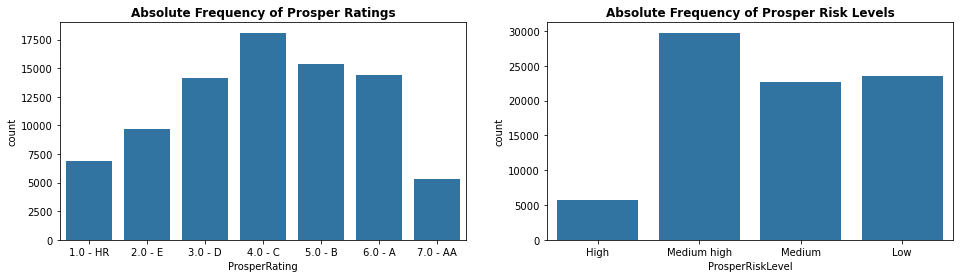

In [39]:
plt.figure(figsize = [16, 4])

base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
sns.countplot(data = loan_clean, x = 'ProsperRating', color = base_color)
plt.title('Absolute Frequency of Prosper Ratings', fontsize = 12, fontweight = 'bold')

plt.subplot(1, 2, 2)
sns.countplot(data = loan_clean, x = 'ProsperRiskLevel', color = base_color)
plt.title('Absolute Frequency of Prosper Risk Levels', fontsize = 12, fontweight = 'bold')
plt.show()

It is clear from the countplots that the highest loan distribution belongs to the rating "4.0-C," and the level of risk connected to the greatest loan count is "medium high."

#### Exploration 5

- in this section of our exploration, we want to examine the listing's category that received the most selections and the majority of loan borrowers' employment status.

In [40]:
#we assigned gen_order as the variable representing the EmploymentStatus categorical levels
gen_order = loan_clean['EmploymentStatus'].value_counts().index
gen_order

Index(['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
       'Part-time', 'Not employed', 'Retired'],
      dtype='object')

In [41]:
##we assigned order as the variable representing the ListingCategory categorical levels
order = loan_clean['ListingCategory'].value_counts().index
order

Index(['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',
       'Business', 'Auto', 'Personal Loan', 'Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Vacation',
       'Wedding Loans', 'Student Use', 'Motorcycle', 'Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV'],
      dtype='object')

In [42]:
n_loan = loan_clean['ListingCategory'].value_counts().sum()
print(n_loan)
n_loan_Emp_status = loan_clean['EmploymentStatus'].value_counts().sum()
print(n_loan_Emp_status)

113066
110811


In [43]:
category_counts = loan_clean['ListingCategory'].value_counts()
Employment_stat_counts = loan_clean['EmploymentStatus'].value_counts()

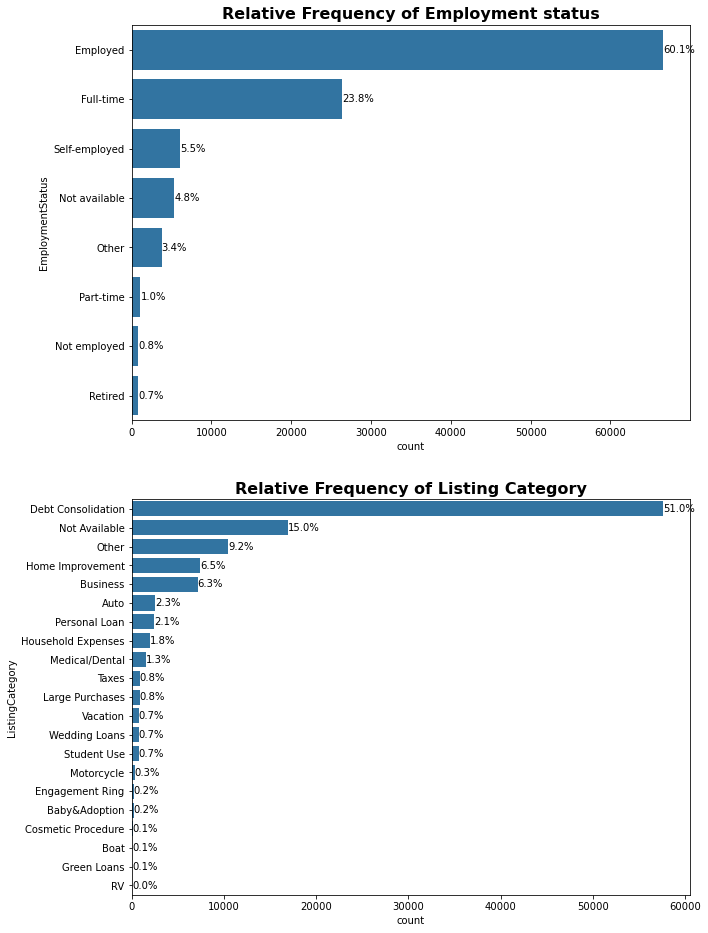

In [44]:
plt.figure(figsize = [10, 16]) #figure size

plt.subplot(2, 1, 1)
gen_order = loan_clean['EmploymentStatus'].value_counts().index
sns.countplot(data = loan_clean, y = 'EmploymentStatus', order = gen_order, color = base_color)
# Logic to print the proportion text on the bars
for i in range (Employment_stat_counts.shape[0]):
    count = Employment_stat_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count / n_loan_Emp_status)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Relative Frequency of Employment status', fontsize = 16, fontweight = 'bold')



plt.subplot(2, 1, 2)
order = loan_clean['ListingCategory'].value_counts().index
sns.countplot(data = loan_clean, y = 'ListingCategory', order = order, color = base_color)
# Logic to print the proportion text on the bars
for i in range (category_counts.shape[0]):
    count = category_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count / n_loan )
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Relative Frequency of Listing Category', fontsize = 16, fontweight = 'bold')




Employed individuals make up a greater proportion of loan borrowers, while retirees make up the smallest proportion. The majority of borrowers choose to use the loan for debt consolidation when choosing their ListingCategory.
- Debt consolidation: it refers to the act of taking out a new loan to pay off other liabilities and consumer debts.

#### Exploration 6

- It is ideal to know the most common loan term offered to borrowers.

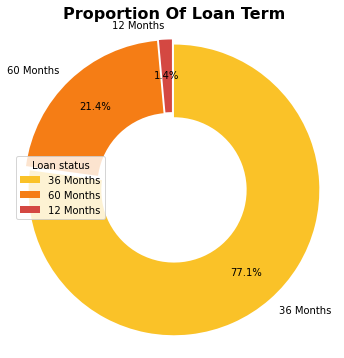

In [45]:
sorted_count = loan_clean['Term'].value_counts()

plt.figure(figsize = [8, 6])

colors = sns.color_palette('inferno_r')
months = ['36 Months', '60 Months', '12 Months']
explodes = (0.02, 0.02, 0.02)

plt.pie(sorted_count, labels = months , autopct='%1.1f%%', pctdistance=0.75,
        explode=explodes, startangle = 90, wedgeprops = {'width' : 0.5}, counterclock = False, colors=colors)

plt.title('Proportion Of Loan Term', fontsize = 16, fontweight = 'bold')
plt.legend(title='Loan status', loc = 6)
plt.axis('square');

It is clear from the donut plot above that the loan term that is most frequently offered is 36 months, accounting for 77.1% of all loan counts, and the period with the lowest proportion is 12 months.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The StatedMonthlyIncome had a wide range of values, therefore I used log transform to examine the data.
The data appeared unimodal after the modification, with a peak of between $3,000 and $5,000 per month.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I separated active loans from inactive loans when examining the percentage of loans granted that are closed (cancelled, completed, charged-off, defaulted). The closed loans are the inactive loans, and I displayed them as others in a new table. Additionally, I aggregated all of the data's past-due debts and added it into the new table. All of these changes were made to make it simpler to represent on a pie chart.

### Bivariate Exploration

According to the data, some borrowers failed to provide their yearly income estimates, others are jobless, and others have no income. As yearly income is a crucial factor that lenders take into account when making loan decisions, we will exclude the categories of these borrowers and focus only on those who have disclosed their income in order to continue our study in this area of exploration.

In [46]:
loan_clean['IncomeRange'].value_counts() 

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [47]:
annual_income_loan = loan_clean[loan_clean['IncomeRange'].isin(['$25,000-49,999', '$50,000-74,999', '$100,000+',
                                   '$75,000-99,999', '$1-24,999'])]

In [48]:
annual_income_loan.columns

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperScore', 'ProsperRiskLevel', 'ProsperRating',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'AvailableBankcardCredit', 'IncomeRange', 'StatedMonthlyIncome',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'LoanOriginationDate',
       'MonthlyLoanPayment'],
      dtype='object')

In [49]:
income = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

IncomeClasses = pd.api.types.CategoricalDtype(ordered = True, categories = income)

annual_income_loan['IncomeRange'] = annual_income_loan['IncomeRange'].astype(IncomeClasses)
annual_income_loan['IncomeRange'].unique()

['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', '$1-24,999']
Categories (5, object): ['$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [50]:
annual_income_loan['Term']

0         36
1         36
3         36
4         36
5         60
          ..
113932    36
113933    36
113934    60
113935    60
113936    36
Name: Term, Length: 103898, dtype: int64

In [51]:
term = [12, 36, 60]

terms = pd.api.types.CategoricalDtype(ordered = True, categories = term)

annual_income_loan['Term'] = annual_income_loan['Term'].astype(terms)
annual_income_loan['Term'].unique()

[36, 60, 12]
Categories (3, int64): [12 < 36 < 60]

In [52]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'DebtToIncomeRatio',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit',
               'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

categorical_vars = ['Term','ProsperRiskLevel', 'ProsperRating', 'IsBorrowerHomeowner', 'IncomeRange']

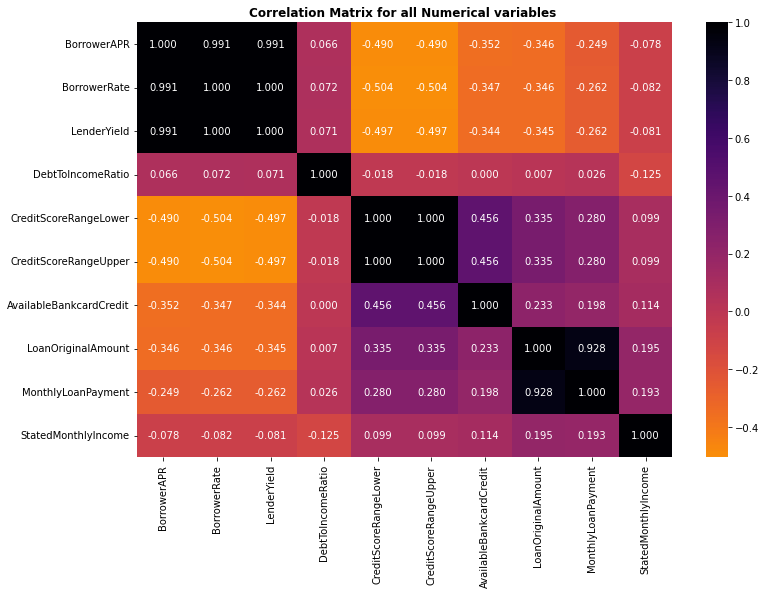

In [53]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(annual_income_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'inferno_r', center = 0)
plt.title('Correlation Matrix for all Numerical variables ', fontweight = 'bold')
plt.show()

loan.shape= (103898, 30)
diamonds_samp.shape= (1000, 30)


<Figure size 1440x864 with 0 Axes>

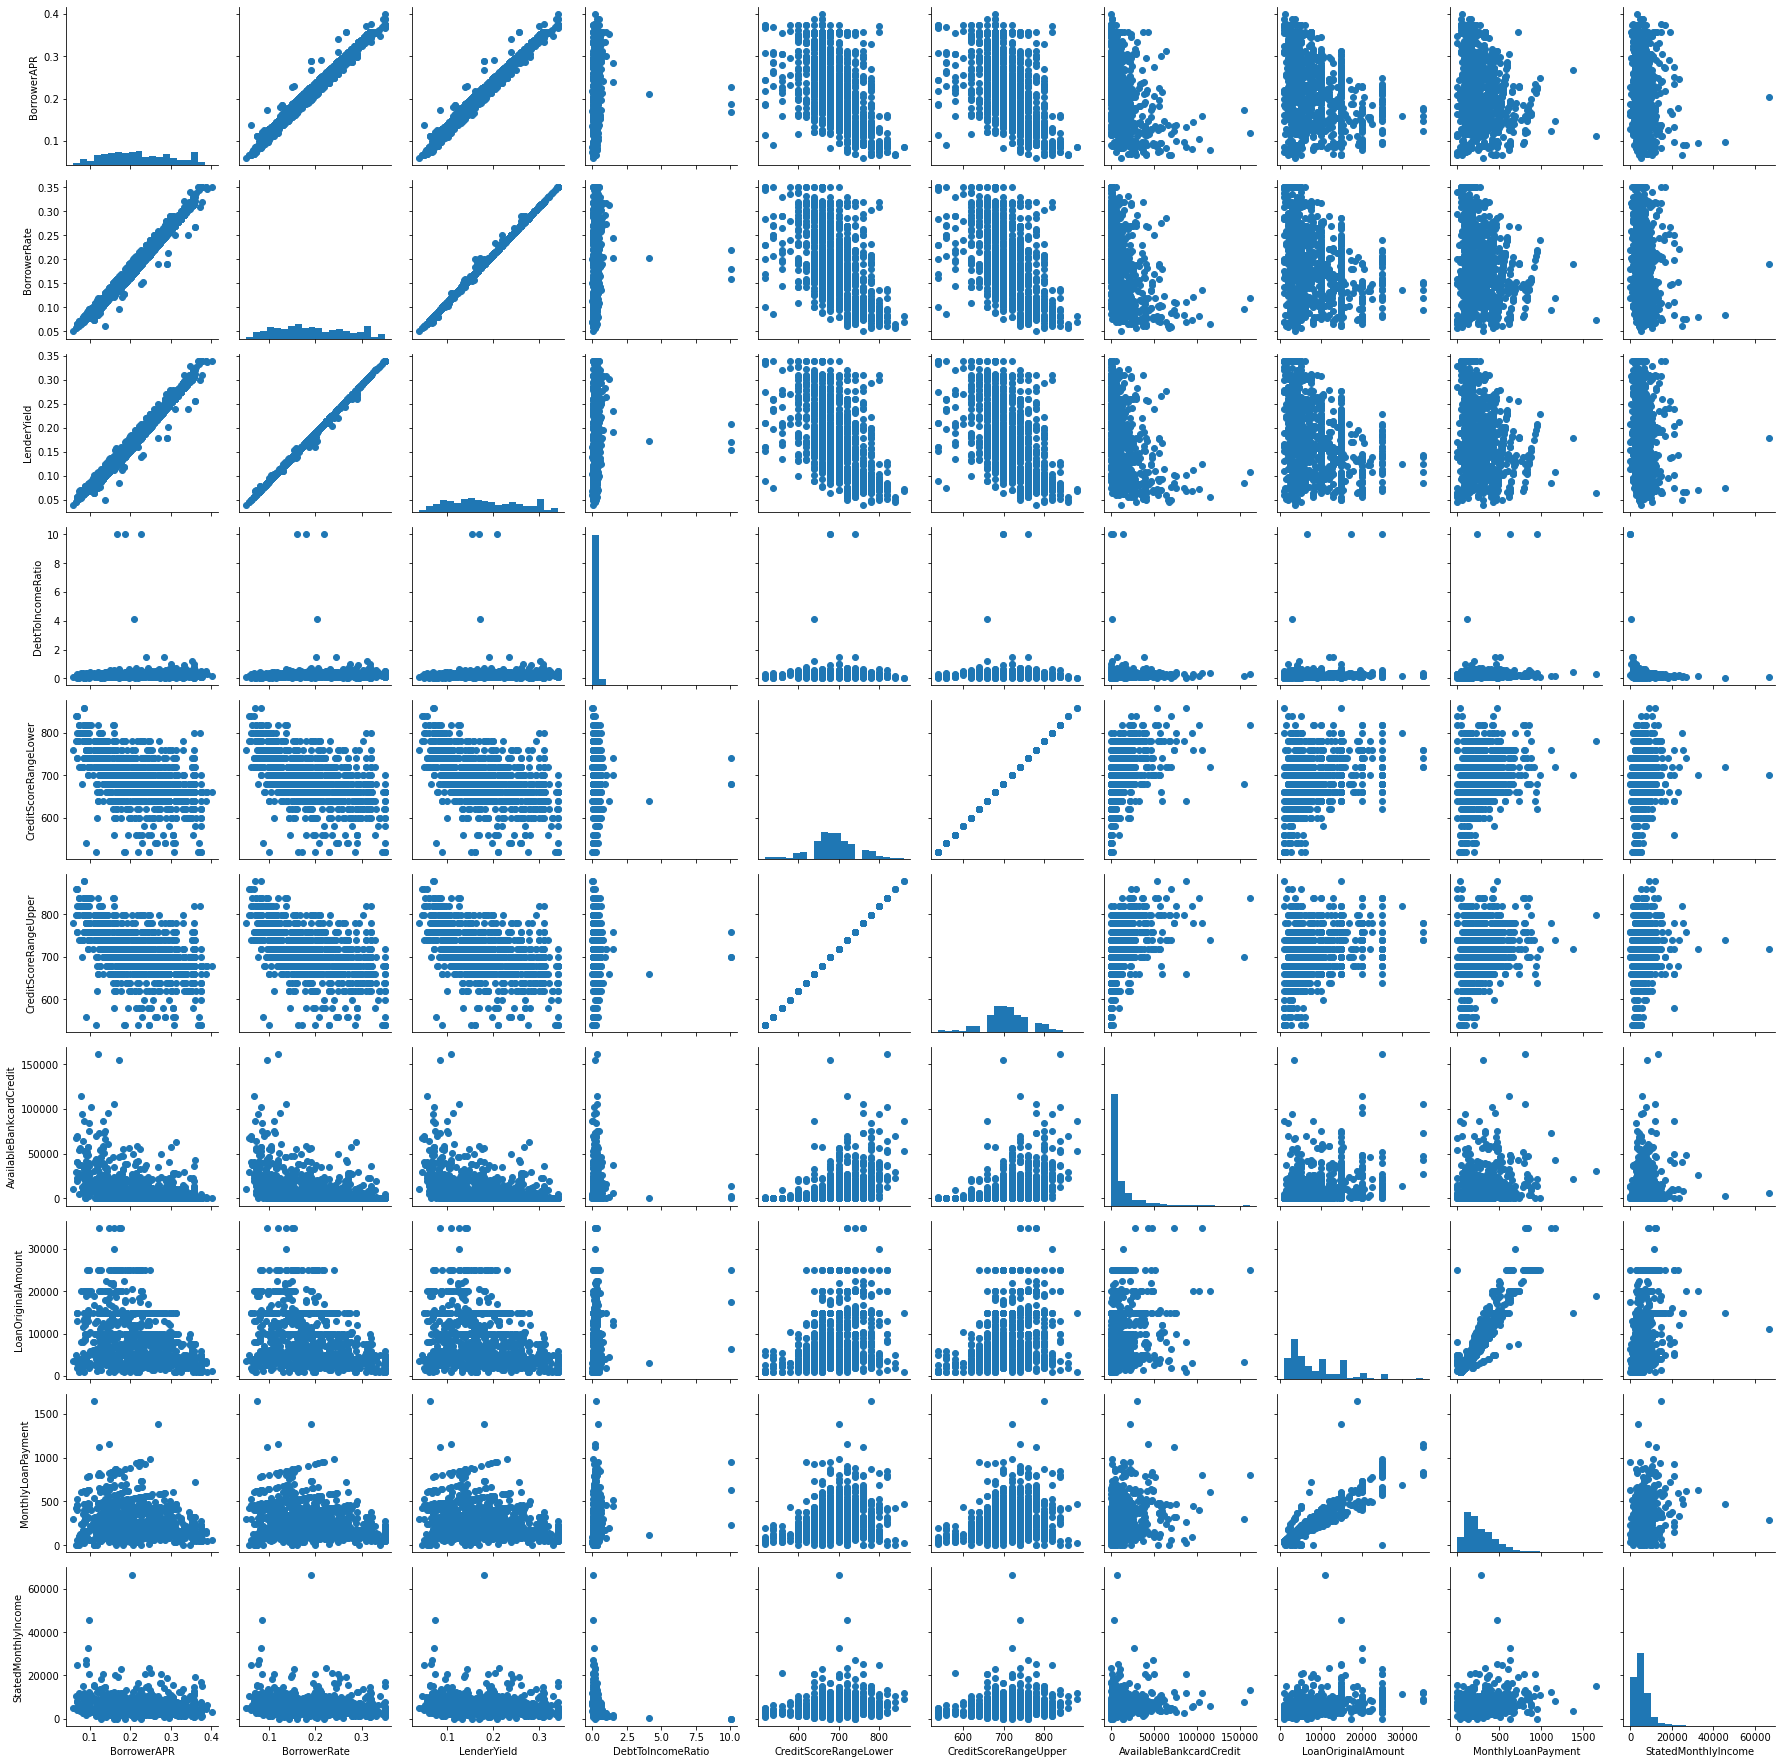

In [54]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster

plt.figure(figsize = [20, 12])
print("loan.shape=",annual_income_loan.shape)
loan_samp = annual_income_loan.sample(n=1000, replace = False)
print("diamonds_samp.shape=",loan_samp.shape)

g = sns.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

- Debt-to-income ratio and borrower APR have a modest association, indicating that the impact of the ratio on the APR is not very substantial.<br>
- The relationship between borrowerAPR and borrowerrate is negative for both credit score groups (higher & lower). This explains why the borrower is eligible for a reduced APR and interest rate with better credit scores.
- There is an inverse relationship between LoanOriginalAmount and the BorrowerAPR. This indicates that the smaller the loans size, the greater the interest rate applied, the higher the loan size, the smaller the interest rate


<Figure size 1080x1080 with 0 Axes>

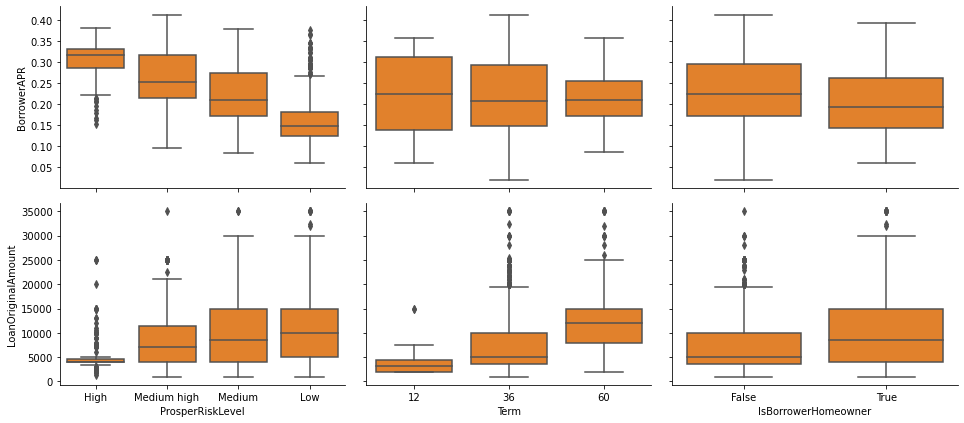

In [55]:
loan_samp = annual_income_loan.sample(n=4000, replace = False) #loan sample of 4000

def boxgrid(x, y, **kwargs):
    """Box plots may be quickly produced using Seaborn's PairGrid.."""
    default_color = sns.color_palette()[1]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [15, 15])
g = sns.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'],
                x_vars =['ProsperRiskLevel', 'Term', 'IsBorrowerHomeowner'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

It's interesting to see that the two important numeric variables appear to have some meaningful correlations with the category variables. The loan amounts awarded to borrowers with the highest risk levels are remarkably small. This relates to a common scenario in which lenders won't be prepared to offer greater loans when they believe the risk to be very high. 

Longer loan terms are linked to higher loan amounts, with a 60-month loan often costing between $10,000 and $15,000. This sum exceeds the average loan amount with a shorter term. As compared to other terms, a shorter loan term offers a lower average annual percentage rate. Ideally, the APR is lower for loans with shorter terms.

<Figure size 1440x1440 with 0 Axes>

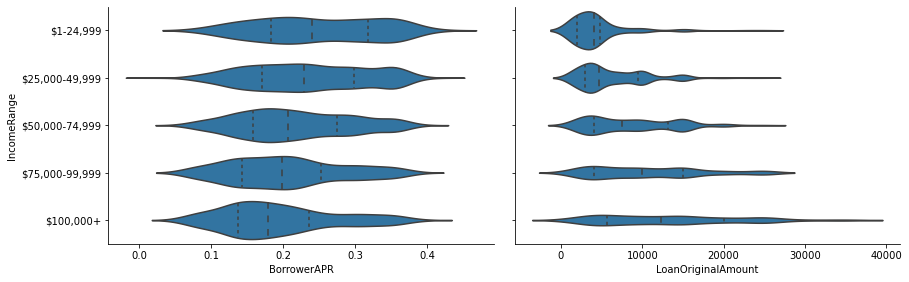

In [56]:
def violingrid(x, y, **kwargs):
    """Violin plots may be quickly produced using Seaborn's PairGrid.."""
    default_color = sns.color_palette()[0]
    sns.violinplot(x=x, y=y, color=default_color, inner = 'quartiles')
    
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = loan_samp, x_vars = ['BorrowerAPR', 'LoanOriginalAmount'],
                y_vars =['IncomeRange'],
                height = 4, aspect = 1.5)

g.map(violingrid)
plt.show()

It is clear from the violinplot that higher income levels have a smaller average APR and a lower dispersion of APR than lower income ranges do. 
Borrowers with higher income ranges typically receive loans with bigger amounts, while those with lower incomes typically receive loans with smaller amounts.

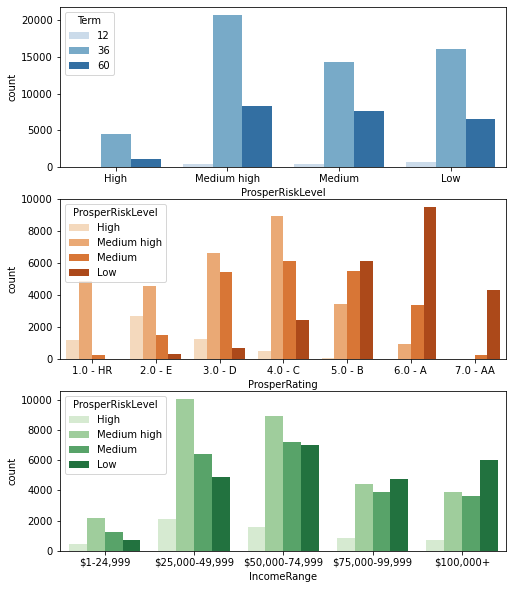

In [57]:
plt.figure(figsize = [8, 10])

# subplot 1: ProsperRiskLevel vs Term
plt.subplot(3, 1, 1)
sns.countplot(data = annual_income_loan , x = 'ProsperRiskLevel', hue = 'Term', palette = 'Blues')


# subplot 2: ProsperRating vs ProsperRiskLevel
ax = plt.subplot(3, 1, 2)
sns.countplot(data = annual_income_loan , x = 'ProsperRating',
             hue = 'ProsperRiskLevel', palette = 'Oranges')


# subplot 3: IncomeRange vs ProsperRiskLevel
ax = plt.subplot(3, 1, 3)
sns.countplot(data = annual_income_loan , x = 'IncomeRange',
             hue = 'ProsperRiskLevel', palette = 'Greens')
plt.show()

The majority of loans made fall into the medium-high risk category, with the longest duration loan being 36 months. The intermediate income levels ($25,000 - $49,999, $50,000 - 74,999) also seem to have a higher risk (high, medium-high, medium).

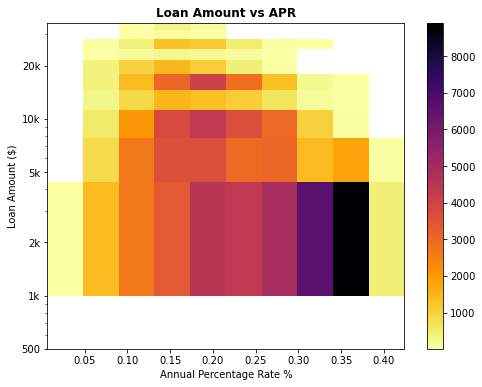

In [58]:
plt.figure(figsize = [8, 6])
plt.hist2d(data = annual_income_loan , x = 'BorrowerAPR', y = 'LoanOriginalAmount',
           cmin = 10, cmap='inferno_r')
plt.colorbar()
plt.xlabel('Annual Percentage Rate %')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount vs APR', fontweight = 'bold')
plt.show()

I've created a heat map with a color scheme that progresses from bright to dark, and I've set it up such that any cells with no data are left uncolored.
According to the depiction, the majority of loans fall along a line where higher APRs are associated with lesser loan amounts.

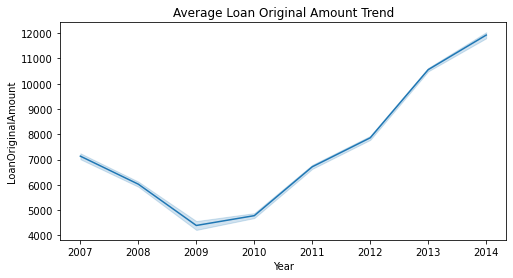

In [59]:
plt.figure(figsize = [8, 4])

sns.lineplot(data = annual_income_loan, x =annual_income_loan[
    'LoanOriginationDate'].dt.year , y = 'LoanOriginalAmount')

plt.xlabel('Year')
plt.title('Average Loan Original Amount Trend')
plt.show()


The average loan amount issued to the borrower decreased from 2007 to 2009, as seen by the line plot above, which shows the trends of average loan initial amount for each year starting in 2007. In 2009, the trend reached its lowest point and The reason for this is because prosper closed in 2009 to complete the SEC filing procedure and reopened on July 1st, 2009, following SEC registration. [Prosper 2009](https://onlinemoneyfordads.com/is-prosper-a-scam-get-the-answers-in-my-review/#:~:text=Prosper%20had%20shut%20down%20in%202009%20to%20go,scale%3B%20so%20Prosper%E2%80%99s%20rank%20is%20an%20excellent%20rating).

The average loan amount issued to borrowers increased steadily starting in 2010 and continued through 2014, according to data.

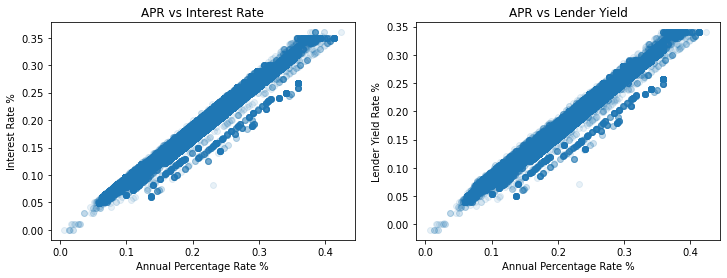

In [60]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.scatter(data = annual_income_loan, x = 'BorrowerAPR', y = 'BorrowerRate', alpha = 1/10)
plt.xlabel('Annual Percentage Rate %')
plt.ylabel('Interest Rate %')
plt.title('APR vs Interest Rate')


plt.subplot(1, 2, 2)
plt.scatter(data = annual_income_loan, x = 'BorrowerAPR', y = 'LenderYield', alpha = 1/10)
plt.xlabel('Annual Percentage Rate %')
plt.ylabel('Lender Yield Rate %')
plt.title('APR vs Lender Yield')


plt.show()

Understanding the distinction between the quoted interest rate and the annual percentage rate (APR), which takes into account any additional charges or fees, is crucial when assessing the cost of a loan or line of credit.
- The interest rate is the cost of borrowing principal, and this rate may be stated at the time of loan closing.
- The APR is almost always higher than the interest rate, as it includes other costs associated with borrowing the money. [Int Rate vs APR](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp)

Since there is a significant positive link between the two factors, the greater the APR, the higher the interest rate will be.

Another factor that strongly correlates with the APR is the lender yield, which is the interest rate less servicing costs such taxes on interest income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Fascinatingly, there is a little correlation between debt-to-income ratio and borrower APR, suggesting that the ratio's influence on APR is not particularly significant. Additionally, the LoanOriginalAmount and BorrowerAPR have an inverse connection. According to this, the interest rate is lower when the loan size is larger and higher when the loan size is less.

A further intriguing finding is that larger loan amounts are associated with longer loan durations, with a 60-month loan typically costing between $10,000 and $15,000. With a shorter period, this amount is greater than the typical loan amount. A loan with a shorter term gives a lower average annual percentage rate than loans with longer periods. For loans with shorter durations, the APR should ideally be lower.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Another finding from the data is that loans made to borrowers with intermediate incomes ($25,000–$49,999, $50,000–$74,999) also appear to be more risky (high, medium-high, medium). The borrower obtained loans worth on average less between 2007 and 2009. Because prosper reopened on July 1st, 2009, following SEC registration, it closed in 2009 to complete the SEC filing procedure. 2009 saw the trend's low point.

### Multivariate Exploration

In this section, we'll keep investigating the loan data with borrowers who provided their salary ranges.



In [61]:
def hist2dgrid(x, y, **kwargs):
    """ Seaborn's PairGrid can be quickly modified to make heat maps. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.4+0.04, 0.04 )
    bins_y = 10**np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.yscale('log')
    plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4],
               [500, '1k', '2k', '5k', '10k', '20k'])

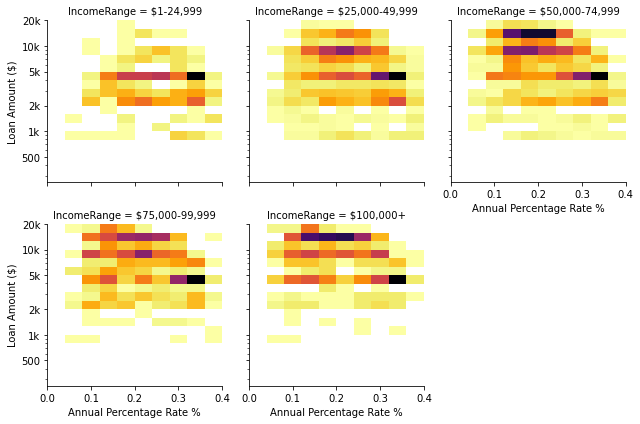

In [62]:
loan_samp = annual_income_loan.sample(n=4000, replace = False) #loan sample of 4000

g = sns.FacetGrid(data = loan_samp, col = 'IncomeRange', col_wrap = 3, height = 3,
                 xlim = [0, 0.35])
g.map(hist2dgrid, 'BorrowerAPR', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('Annual Percentage Rate %')
g.set_ylabels('Loan Amount ($)')

plt.show()

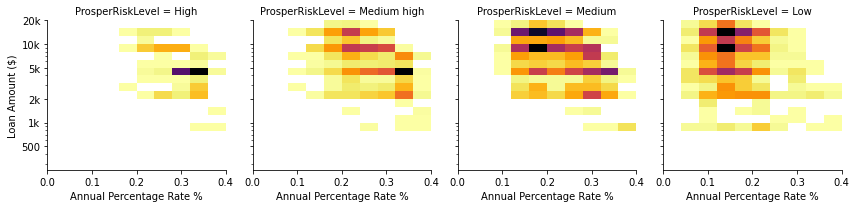

In [63]:
loan_samp = annual_income_loan.sample(n=4000, replace = False) #loan sample of 4000

g = sns.FacetGrid(data = loan_samp, col = 'ProsperRiskLevel', col_wrap = 4, height = 3,
                 xlim = [0, 0.35])
g.map(hist2dgrid, 'BorrowerAPR', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('Annual Percentage Rate %')
g.set_ylabels('Loan Amount ($)')

plt.show()

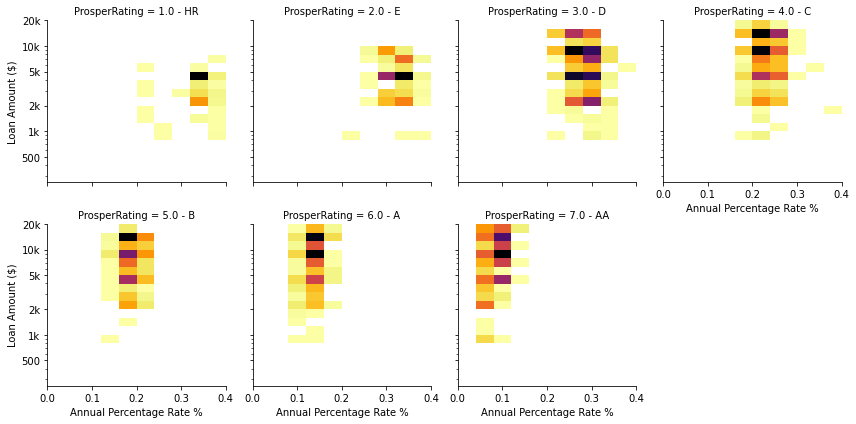

In [64]:
loan_samp = annual_income_loan.sample(n=4000, replace = False)

g = sns.FacetGrid(data = loan_samp, col = 'ProsperRating', col_wrap = 4, height = 3,
                 xlim = [0, 0.35])
g.map(hist2dgrid, 'BorrowerAPR', 'LoanOriginalAmount', color = 'inferno_r')
g.set_xlabels('Annual Percentage Rate %')
g.set_ylabels('Loan Amount ($)')

plt.show()

You may observe the borrower's income ranges, the risk of the loans, the Prosper rating for those loans, and their link to the loan amount and the APR to varied degrees of efficacy in the faceted heat maps. The tangling of dots shift to the top portion of the plot at each progressed level, indicating a growth in the loan amount, although the APR doesn't appear to fluctuate too much.

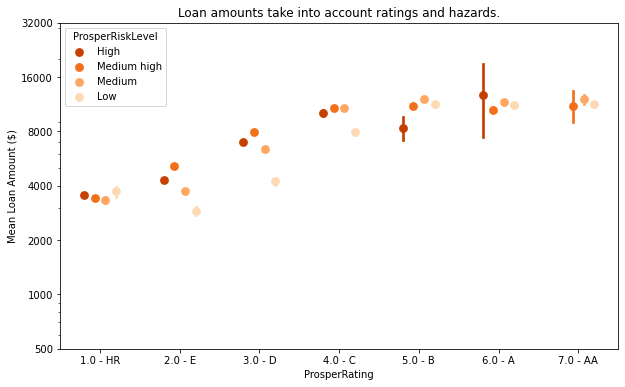

In [66]:
fig = plt.figure(figsize = [10,6])

ax = sns.pointplot(data = annual_income_loan, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'ProsperRiskLevel',
           palette = 'Oranges_r', linestyles = '', dodge = 0.4)
plt.title('Loan amounts take into account ratings and hazards.')
plt.ylabel('Mean Loan Amount ($)')
plt.yscale('log')
plt.yticks([5e2, 1e3, 2e3, 4e3, 8e3, 16e3, 32e3], ['500', '1000', '2000', '4000', '8000', '16000', '32000'])
ax.set_yticklabels([],minor = True)
plt.show();

ProsperRating and ProsperRiskLevel have a definite impact on loan amounts, as demonstrated by a dodge point for loans.
There are fewer loans with higher rating grades, which accounts for the wider error bars on the right side. Moreover, according to the highest ratings, "7.0 - AA," there appear to be no loans with a risk level of "High."

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I deepened my analysis by examining how much money was borrowed at each APR in relation to the risk and ratings of the loans. I found that the loan amount issued decreased as the risk level increased while the APR for such a hazardous loan remained high.
The analysis also showed that more loans were given to those with middle- and high-income levels, and the APR decreased accordingly.
I also see that the riskiest loans typically have the highest ratings.

### Were there any interesting or surprising interactions between features?

> The number of high-risk loans disbursed at the rating level of "6.0 - A" is lower, but the APR is often lower. This insight shows that loan ratings affect APR more significantly than risk level does.


## Conclusions

Exploring the Prosper loan data is a fascinating exercise that reveals how the lending system and operations function. The less significant variables were filtered out of the dataset used for the exploration, which contains a huge number of variables. The BorrowerAPR (annual interest rate), monthly income, the BorrowerRate (interest rate), and various income ranges were among the important factors.

Prosper employs a grading system to rank different loans. Additionally, it assigns a risk score to loans based on a number of significant characteristics. To make our analysis successful, all of them were investigated, and some alterations and adjustments were made to those crucial factors.

It was found that Prosper frequently gives its customers a loan period of 36 months or more, and the majority of the loans were really utilized for debt consolidation. A significant portion of the loans are still ongoing, and there are those that have already been closed. Due to the decreased risk involved, Prosper prefers to lend to a variety of middle- to upper-income individuals. One of the major takeaways from this analysis is that ratings have a larger impact on loan approvals than actual loan risks.